In [1]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import numpy as np
import pickle

In [2]:
with open('data/data.pickle', 'rb') as handle:
    position_data = pickle.load(handle)

planned_positions = position_data["planned"]
measured_positions = position_data["measured"]
time = position_data["time"]

In [3]:
planned_positions_array = np.concatenate(planned_positions, axis=1)
measured_positions_array = np.concatenate(measured_positions, axis=1)

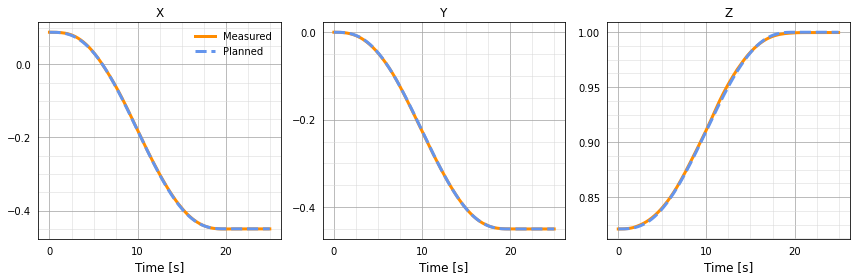

In [38]:
fig, axs = plt.subplots(1, 3, figsize=(12, 4))
n = 6000
titles = ["X", "Y", "Z"]

for i in range(3):
    axs[i].xaxis.set_major_locator(MultipleLocator(10.0))
    axs[i].xaxis.set_minor_locator(MultipleLocator(2.5))
    
    if i != 2:
        axs[i].yaxis.set_major_locator(MultipleLocator(0.2))
        axs[i].yaxis.set_minor_locator(MultipleLocator(0.05))
    else:
        axs[i].yaxis.set_major_locator(MultipleLocator(0.05))
        axs[i].yaxis.set_minor_locator(MultipleLocator(0.0125))
    
    axs[i].plot(time[:n], measured_positions_array[i, :n], linewidth=3, color="darkorange", label="Measured")
    axs[i].plot(time[:n], planned_positions_array[i, :n], linewidth=3, color="cornflowerblue", linestyle="dashed", label="Planned")
    
    axs[i].set_xlabel("Time [s]", fontsize=12)
    axs[i].set_title(titles[i], fontsize=12)
    
    axs[i].grid(True, "minor", color="0.85", linewidth=0.50, zorder=-20)
    axs[i].grid(True, "major", color="0.65", linewidth=0.75, zorder=-10)
    axs[i].tick_params(which="both", bottom=False, left=False)

axs[0].legend(frameon=False)

plt.tight_layout()
plt.savefig("imgs/tracking.png", dpi=200, transparent=False, bbox_inches="tight")